### Cat and Dog Classification

In [12]:
from glob import glob
import os
import cv2

In [13]:
img_dir = '../Downloads/catanddog/'

tr_imgs = glob(img_dir+'train/*/*.jpg')
te_imgs = glob(img_dir+'test/*/*.jpg')

In [14]:
print('# of train images : {}'.format(len(tr_imgs)))
print('# of test images : {}'.format(len(te_imgs)))

# of train images : 8005
# of test images : 2023


In [15]:
tr_dogs = [img for img in tr_imgs if img.split('\\')[-2] =='dogs']
tr_cats = [img for img in tr_imgs if img.split('\\')[-2] =='cats']

te_dogs = [img for img in te_imgs if img.split('\\')[-2] =='dogs']
te_cats = [img for img in te_imgs if img.split('\\')[-2] =='cats']


print('train--------------')
print('# of dog : {}'.format(len(tr_dogs)))
print('# of cat : {}'.format(len(tr_cats)))

print('test--------------')
print('# of dog : {}'.format(len(te_dogs)))
print('# of cat : {}'.format(len(te_cats)))

train--------------
# of dog : 4005
# of cat : 4000
test--------------
# of dog : 1012
# of cat : 1011


In [16]:
import random

random.shuffle(tr_imgs)

tr_x = tr_imgs
# cat = 0, dog = 1
tr_y = [0 if img.split('\\')[-2] =='cats' else 1 for img in tr_imgs ]

tr_y

[1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,


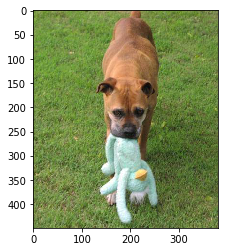

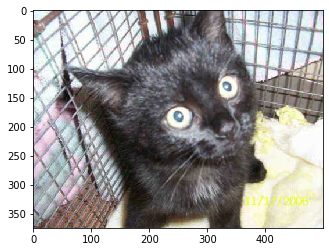

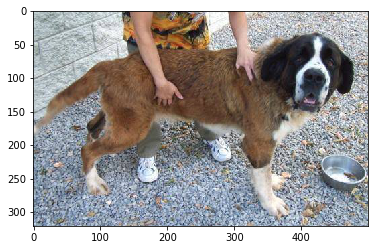

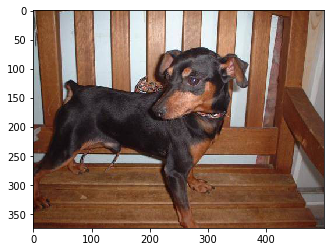

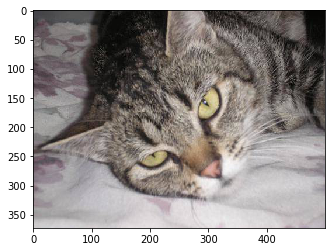

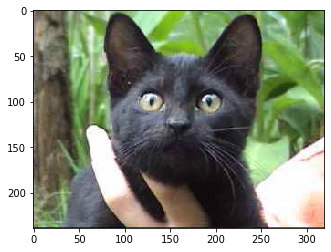

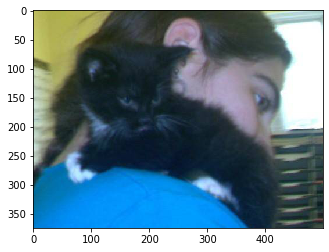

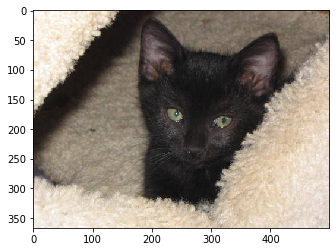

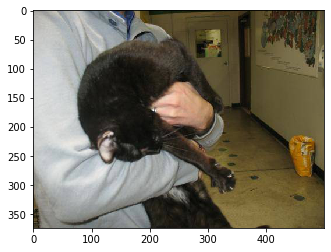

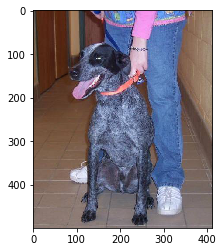

In [18]:
import matplotlib.pyplot as plt

for img in tr_x[:10] :
    plt.show()
    plt.imshow(plt.imread(img))

In [120]:
# image sizes are different
# let's find out average image size

tr_x_width = [plt.imread(img).shape[0] for img in tr_x]
tr_x_height = [plt.imread(img).shape[1] for img in tr_x]

average size of images are approximately (360.494440974391,403.7998750780762) .


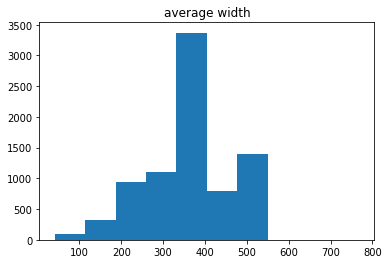

Text(0.5, 1.0, 'average height')

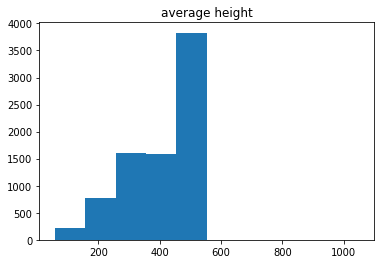

In [121]:
print('average size of images are approximately ({},{}) .'.format(sum(tr_x_width)/len(tr_x_width), sum(tr_x_height)/len(tr_x_height)))
plt.hist(tr_x_width)
plt.title('average width')
plt.show()
plt.hist(tr_x_height)
plt.title('average height')


## resize image into (360, 400)

In [40]:
import keras
import tensorflow as tf
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Activation, Flatten
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam

def build_model(input_shape) :
    x = Input(shape = input_shape) # (224,224, 3)
    conv2d_1 = Conv2D(32, 3)(x) # (222, 222, 32)
    bn_1 = BatchNormalization()(conv2d_1)
    relu_1 = Activation('relu')(bn_1)
    
    conv2d_2 = Conv2D(32,5)(relu_1) # (218, 218, 32)
    maxpool_1 = MaxPool2D(3)(conv2d_2) # (72, 72, 32)
    relu_2 = Activation('relu')(maxpool_1)
    
    conv2d_3 = Conv2D(32,5)(relu_2) # (72, 72, 32)
    maxpool_2 = MaxPool2D(3)(conv2d_3) #(68,68,32)
    relu_3 = Activation('relu')(maxpool_2)
    
    dense1 = Dense(768)(relu_3)    
    flatten = Flatten()(dense1)
    dense2 = Dense(1, activation='sigmoid')(flatten)
    
    return tf.keras.Model(x, dense2)
    

In [41]:
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.models import Sequential

def densenet(input_shape) :
    x = Sequential()
    x.add( DenseNet121(input_shape=(224,224,3), 
                include_top = False,
                pooling='max'
                ))
    
    x.add(Dense(1, activation = 'sigmoid'))
    
    return x



In [31]:
# model = build_model((224,224,3))
densenet_model = densenet((224,224,3))

In [33]:
adam = Adam()
# model.compile(loss = 'binary_crossentropy',optimizer = adam, metrics=['accuracy'])
densenet_model.compile(loss = 'binary_crossentropy',optimizer = adam, metrics=['accuracy'])
# model.summary()
densenet_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 7,038,529
Trainable params: 6,954,881
Non-trainable params: 83,648
_________________________________________________________________


In [52]:
# files into images
def preprocessing(img) :
    
    img = cv2.imread(img)
    img = cv2.resize(img, (224,224))
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type= cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    return img

tr_x_img = [preprocessing(x) for x in tr_x]

# cv2.resize(cv2.imread(tr_x[0]),(224,224))/255.0[0]

In [53]:
import numpy as np

tr_x_img = np.array(tr_x_img)
tr_y = np.array(tr_y)

In [55]:
tr_x_img[0]

array([[[0.27165353, 0.62992126, 0.5       ],
        [0.25984251, 0.6023622 , 0.47244096],
        [0.2519685 , 0.5866142 , 0.4606299 ],
        ...,
        [0.2519685 , 0.496063  , 0.43307087],
        [0.2480315 , 0.5       , 0.44094488],
        [0.20866142, 0.47637796, 0.41732284]],

       [[0.27165353, 0.62204725, 0.492126  ],
        [0.24015749, 0.5866142 , 0.4566929 ],
        [0.22047244, 0.5551181 , 0.42913386],
        ...,
        [0.26377952, 0.503937  , 0.4488189 ],
        [0.2874016 , 0.53149605, 0.47637796],
        [0.24015749, 0.492126  , 0.4448819 ]],

       [[0.21653543, 0.5590551 , 0.42913386],
        [0.22047244, 0.5629921 , 0.43307087],
        [0.21653543, 0.5551181 , 0.42519686],
        ...,
        [0.3464567 , 0.5629921 , 0.515748  ],
        [0.3464567 , 0.57086617, 0.52755904],
        [0.32283464, 0.5511811 , 0.507874  ]],

       ...,

       [[0.2913386 , 0.5826772 , 0.4448819 ],
        [0.2952756 , 0.5748032 , 0.44094488],
        [0.26377952, 0

In [59]:
# tf.test.is_gpu_available은 deprecate 됬다고 한다. 요걸 써주자.
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [61]:
# batch size를 64로 하니까 OOM (out of memory)가 떴다. batch size는 웬만하면 2의 제곱값으로 해주자.
densenet_model.fit(tr_x_img, tr_y, batch_size= 32, epochs= 20)

Train on 8005 samples
Epoch 1/20
8005/8005 [==============================] - 64s 8ms/sample - loss: 0.3306 - accuracy: 0.8982
Epoch 2/20
8005/8005 [==============================] - 55s 7ms/sample - loss: 0.1990 - accuracy: 0.9342
Epoch 3/20
8005/8005 [==============================] - 54s 7ms/sample - loss: 0.1658 - accuracy: 0.9430
Epoch 4/20
8005/8005 [==============================] - 54s 7ms/sample - loss: 0.1982 - accuracy: 0.9283
Epoch 5/20
8005/8005 [==============================] - 54s 7ms/sample - loss: 0.0818 - accuracy: 0.9673
Epoch 6/20
8005/8005 [==============================] - 54s 7ms/sample - loss: 0.0623 - accuracy: 0.9748
Epoch 7/20
8005/8005 [==============================] - 54s 7ms/sample - loss: 0.2082 - accuracy: 0.9134
Epoch 8/20
8005/8005 [==============================] - 55s 7ms/sample - loss: 0.0745 - accuracy: 0.9719
Epoch 9/20
8005/8005 [==============================] - 55s 7ms/sample - loss: 0.0778 - accuracy: 0.9690
Epoch 10/20
8005/8005 [==========

In [63]:
# model.save_weights('./ckpt')
densenet_model.save('ckpt/densenet_clm.h5')

In [64]:
# 테스트 이미지 정제
def prepare_data(file_list) :
    
    random.shuffle(file_list)
    
    x = np.array([preprocessing(x) for x in file_list])
    y = np.array([0 if img.split('\\')[-2] =='cats' else 1 for img in file_list ])
    
    return x, y

te_x, te_y = prepare_data(te_imgs)

In [68]:
# evaluation on test image
densenet_model.evaluate(te_x, te_y)

# 91%의 정확도

2023/2023 [==============================] - 9s 4ms/sample - loss: 0.2157 - accuracy: 0.9194


[0.21567998198931368, 0.9194266]

In [71]:
predictions = densenet_model.predict(te_x)

In [78]:
predictions = [0 if pred<0.5 else 1 for pred in predictions]

In [79]:
tf.math.confusion_matrix(te_y, predictions)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1003,    8],
       [ 155,  857]])>

In [89]:
!pip3 install PyQt4

ERROR: Could not find a version that satisfies the requirement PyQt4 (from versions: none)
ERROR: No matching distribution found for PyQt4
